# Removed headers from dataset and end rows containing text not relevant for coding 

In [462]:
# Dependencies
import pandas as pd

In [463]:
# Read Excel and specific tab
age_df = pd.read_excel("Resources/commonwealth electorate data.xls", sheet_name = "Table 2")

In [464]:
# Show first 5 rows
age_df.head()

,electoral_division,0 to 17 years old,18 to 34 years old,35 to 49 years old,50 to 64 years old,65 to 79 years old,80 years old and over
0,Adelaide,0.179,0.313,0.195,0.166,0.102,0.045
1,Aston,0.215,0.234,0.205,0.193,0.115,0.038
2,Ballarat,0.231,0.220,0.189,0.188,0.130,0.042
3,Banks,0.210,0.253,0.197,0.182,0.108,0.049
4,Barker,0.221,0.187,0.183,0.210,0.150,0.049


In [465]:
# Show all columns
age_df.columns

Index(['electoral_division', '0 to 17 years old', '18 to 34 years old',
       '35 to 49 years old', '50 to 64 years old', '65 to 79 years old',
       '80 years old and over'],
      dtype='object')

In [466]:
# Show all datatypes
age_df.dtypes

electoral_division        object
0 to 17 years old        float64
18 to 34 years old       float64
35 to 49 years old       float64
50 to 64 years old       float64
65 to 79 years old       float64
80 years old and over    float64
dtype: object

The datatypes are as expected (object for division name and float for the remaining as these represent percentages).

In [467]:
# Count rows
len(age_df)

151

In [468]:
# Drop any missing values values
age_df = age_df.dropna(how="any")
age_df.head()

,electoral_division,0 to 17 years old,18 to 34 years old,35 to 49 years old,50 to 64 years old,65 to 79 years old,80 years old and over
0,Adelaide,0.179,0.313,0.195,0.166,0.102,0.045
1,Aston,0.215,0.234,0.205,0.193,0.115,0.038
2,Ballarat,0.231,0.220,0.189,0.188,0.130,0.042
3,Banks,0.210,0.253,0.197,0.182,0.108,0.049
4,Barker,0.221,0.187,0.183,0.210,0.150,0.049


In [469]:
# Check whether all divisions are unique
age_df["electoral_division"].is_unique

True

In [470]:
# Count rows age demo
len(age_df)

151

In [471]:
# Summary statistics age_df
age_df.describe()

,0 to 17 years old,18 to 34 years old,35 to 49 years old,50 to 64 years old,65 to 79 years old,80 years old and over
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,0.224185,0.240901,0.199245,0.179371,0.116722,0.039556
std,0.031683,0.057715,0.017514,0.022331,0.029779,0.012864
min,0.081000,0.144000,0.158000,0.107000,0.057000,0.008000
25%,0.211000,0.202000,0.186500,0.162000,0.095500,0.030500
50%,0.225000,0.227000,0.198000,0.180000,0.113000,0.041000
75%,0.245000,0.268500,0.211000,0.195500,0.136000,0.049000
max,0.286000,0.544000,0.248000,0.227000,0.206000,0.066000


In [472]:
# Read in electorate division info csv
div_df = pd.read_csv("01-output_electorate_division_information/electoral_division.csv")
div_df.head()

,division_id,electoral_division,state
0,179,Adelaide,SA
1,197,Aston,VIC
2,198,Ballarat,VIC
3,103,Banks,NSW
4,180,Barker,SA


In [473]:
# Checking for duplicates
div_df['division_id'].is_unique

True

In [474]:
# Summary statistics div_df
div_df.describe()

,division_id
count,150.000000
mean,188.820000
std,55.471992
min,101.000000
25%,145.250000
50%,186.500000
75%,225.750000
max,317.000000


In [475]:
# Add in division_id column to cultural_diversity df through left join
merged = pd.merge(div_df, age_df, how="inner", on="electoral_division")
merged.head()

,division_id,electoral_division,state,0 to 17 years old,18 to 34 years old,35 to 49 years old,50 to 64 years old,65 to 79 years old,80 years old and over
0,179,Adelaide,SA,0.179,0.313,0.195,0.166,0.102,0.045
1,197,Aston,VIC,0.215,0.234,0.205,0.193,0.115,0.038
2,198,Ballarat,VIC,0.231,0.220,0.189,0.188,0.130,0.042
3,103,Banks,NSW,0.210,0.253,0.197,0.182,0.108,0.049
4,180,Barker,SA,0.221,0.187,0.183,0.210,0.150,0.049


In [476]:
# Count rows merged df
len(merged)

143

In [477]:
merged.head()

,division_id,electoral_division,state,0 to 17 years old,18 to 34 years old,35 to 49 years old,50 to 64 years old,65 to 79 years old,80 years old and over
0,179,Adelaide,SA,0.179,0.313,0.195,0.166,0.102,0.045
1,197,Aston,VIC,0.215,0.234,0.205,0.193,0.115,0.038
2,198,Ballarat,VIC,0.231,0.220,0.189,0.188,0.130,0.042
3,103,Banks,NSW,0.210,0.253,0.197,0.182,0.108,0.049
4,180,Barker,SA,0.221,0.187,0.183,0.210,0.150,0.049


In [478]:
# Read in Excel and specific tab population count
pop_df = pd.read_excel("Resources/commonwealth electorate data.xls", sheet_name = "Table 1")

In [479]:
# Check datatypes
pop_df.dtypes

electoral_division                           object
2017 Estimated Resident Population counts     int64
dtype: object

In [480]:
# Count rows pop count
len(pop_df)

151

In [481]:
# Summary statistics pop_df
pop_df.describe()

,2017 Estimated Resident Population counts
count,151.000000
mean,162897.536424
std,18777.022083
min,102079.000000
25%,153909.000000
50%,161803.000000
75%,173616.500000
max,223820.000000


In [482]:
# Merge dataframes to add in pop count
merged2 = pd.merge(merged, pop_df,  
                     on ='electoral_division',  
                     how ='inner') 

merged2

,division_id,electoral_division,state,0 to 17 years old,18 to 34 years old,35 to 49 years old,50 to 64 years old,65 to 79 years old,80 years old and over,2017 Estimated Resident Population counts
0,179,Adelaide,SA,0.179,0.313,0.195,0.166,0.102,0.045,188410
1,197,Aston,VIC,0.215,0.234,0.205,0.193,0.115,0.038,161813
2,198,Ballarat,VIC,0.231,0.220,0.189,0.188,0.130,0.042,154461
3,103,Banks,NSW,0.210,0.253,0.197,0.182,0.108,0.049,164403
4,180,Barker,SA,0.221,0.187,0.183,0.210,0.150,0.049,171058
...,...,...,...,...,...,...,...,...,...,...
138,153,Werriwa,NSW,0.273,0.249,0.208,0.169,0.079,0.022,181173
139,150,Whitlam,NSW,0.234,0.200,0.184,0.188,0.144,0.049,158340
140,178,Wide Bay,QLD,0.213,0.151,0.176,0.227,0.183,0.049,147406
141,234,Wills,VIC,0.183,0.329,0.218,0.138,0.083,0.048,168833


In [483]:
# Delete electoral_division and state column
merged2.drop(["state", "electoral_division"], axis=1, inplace=True)
merged2.head()

,division_id,0 to 17 years old,18 to 34 years old,35 to 49 years old,50 to 64 years old,65 to 79 years old,80 years old and over,2017 Estimated Resident Population counts
0,179,0.179,0.313,0.195,0.166,0.102,0.045,188410
1,197,0.215,0.234,0.205,0.193,0.115,0.038,161813
2,198,0.231,0.220,0.189,0.188,0.130,0.042,154461
3,103,0.210,0.253,0.197,0.182,0.108,0.049,164403
4,180,0.221,0.187,0.183,0.210,0.150,0.049,171058


In [484]:
# Rename columns
merged2.rename(columns={"0 to 17 years old": "0-17(%)", "18 to 34 years old": "18-34(%)", "35 to 49 years old":"35-49(%)", "50 to 64 years old":"50-64(%)", "65 to 79 years old":"65-79(%)", "80 years old and over":"80+(%)", "2017 Estimated Resident Population counts":"pop_count_est"}, inplace=True)
merged2.head()

,division_id,0-17(%),18-34(%),35-49(%),50-64(%),65-79(%),80+(%),pop_count_est
0,179,0.179,0.313,0.195,0.166,0.102,0.045,188410
1,197,0.215,0.234,0.205,0.193,0.115,0.038,161813
2,198,0.231,0.220,0.189,0.188,0.130,0.042,154461
3,103,0.210,0.253,0.197,0.182,0.108,0.049,164403
4,180,0.221,0.187,0.183,0.210,0.150,0.049,171058


In [485]:
# Change percentages to whole numbers
merged2["0-17(%)"] = merged2["0-17(%)"] * 100
merged2["18-34(%)"] = merged2["18-34(%)"] * 100
merged2["35-49(%)"] = merged2["35-49(%)"] * 100
merged2["50-64(%)"] = merged2["50-64(%)"] * 100
merged2["65-79(%)"] = merged2["65-79(%)"] * 100
merged2["80+(%)"] = merged2["80+(%)"] * 100

In [497]:
# Set a comma separator
merged2["pop_count_est"].apply(lambda x : "{:,}".format(x))

0      188,410
1      161,813
2      154,461
3      164,403
4      171,058
        ...   
138    181,173
139    158,340
140    147,406
141    168,833
142    165,418
Name: pop_count_est, Length: 143, dtype: object

In [498]:
merged2

,division_id,0-17(%),18-34(%),35-49(%),50-64(%),65-79(%),80+(%),pop_count_est
0,179,17.9,31.3,19.5,16.6,10.2,4.5,188410
1,197,21.5,23.4,20.5,19.3,11.5,3.8,161813
2,198,23.1,22.0,18.9,18.8,13.0,4.2,154461
3,103,21.0,25.3,19.7,18.2,10.8,4.9,164403
4,180,22.1,18.7,18.3,21.0,15.0,4.9,171058
...,...,...,...,...,...,...,...,...
138,153,27.3,24.9,20.8,16.9,7.9,2.2,181173
139,150,23.4,20.0,18.4,18.8,14.4,4.9,158340
140,178,21.3,15.1,17.6,22.7,18.3,4.9,147406
141,234,18.3,32.9,21.8,13.8,8.3,4.8,168833


In [488]:
df_age_div_pop = merged2.set_index("division_id")

In [489]:
# Show df
df_age_div_pop.head()

,0-17(%),18-34(%),35-49(%),50-64(%),65-79(%),80+(%),pop_count_est
division_id,,,,,,,
179,17.9,31.3,19.5,16.6,10.2,4.5,188410
197,21.5,23.4,20.5,19.3,11.5,3.8,161813
198,23.1,22.0,18.9,18.8,13.0,4.2,154461
103,21.0,25.3,19.7,18.2,10.8,4.9,164403
180,22.1,18.7,18.3,21.0,15.0,4.9,171058


In [490]:
# Count rows merged2 df
len(df_age_div_pop)

143

In [491]:
# Summary statistics merged2
df_age_div_pop.describe()

,0-17(%),18-34(%),35-49(%),50-64(%),65-79(%),80+(%),pop_count_est
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,22.501399,23.999301,19.944755,17.931469,11.672028,3.948252,163220.307692
std,3.134474,5.762182,1.740070,2.246544,2.993265,1.304858,18318.338501
min,8.100000,14.400000,15.800000,10.700000,5.700000,0.800000,102079.000000
25%,21.150000,20.200000,18.800000,16.200000,9.550000,3.000000,154263.000000
50%,22.500000,22.700000,19.800000,18.000000,11.400000,4.100000,161803.000000
75%,24.550000,26.550000,21.100000,19.550000,13.600000,4.900000,173544.000000
max,28.600000,54.400000,24.800000,22.700000,20.600000,6.600000,223820.000000


In [492]:
# Count rows df_final
len(df_age_div_pop)

143

In [493]:
# export df to csv
df_age_div_pop.to_csv("08-output_2016_commonwealth_electoral_population_age/08-extracting_transforming_commonwealth_electoral_population_age.csv")

Exploratory analysis

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B8F5A93A58>,
      dtype=object)

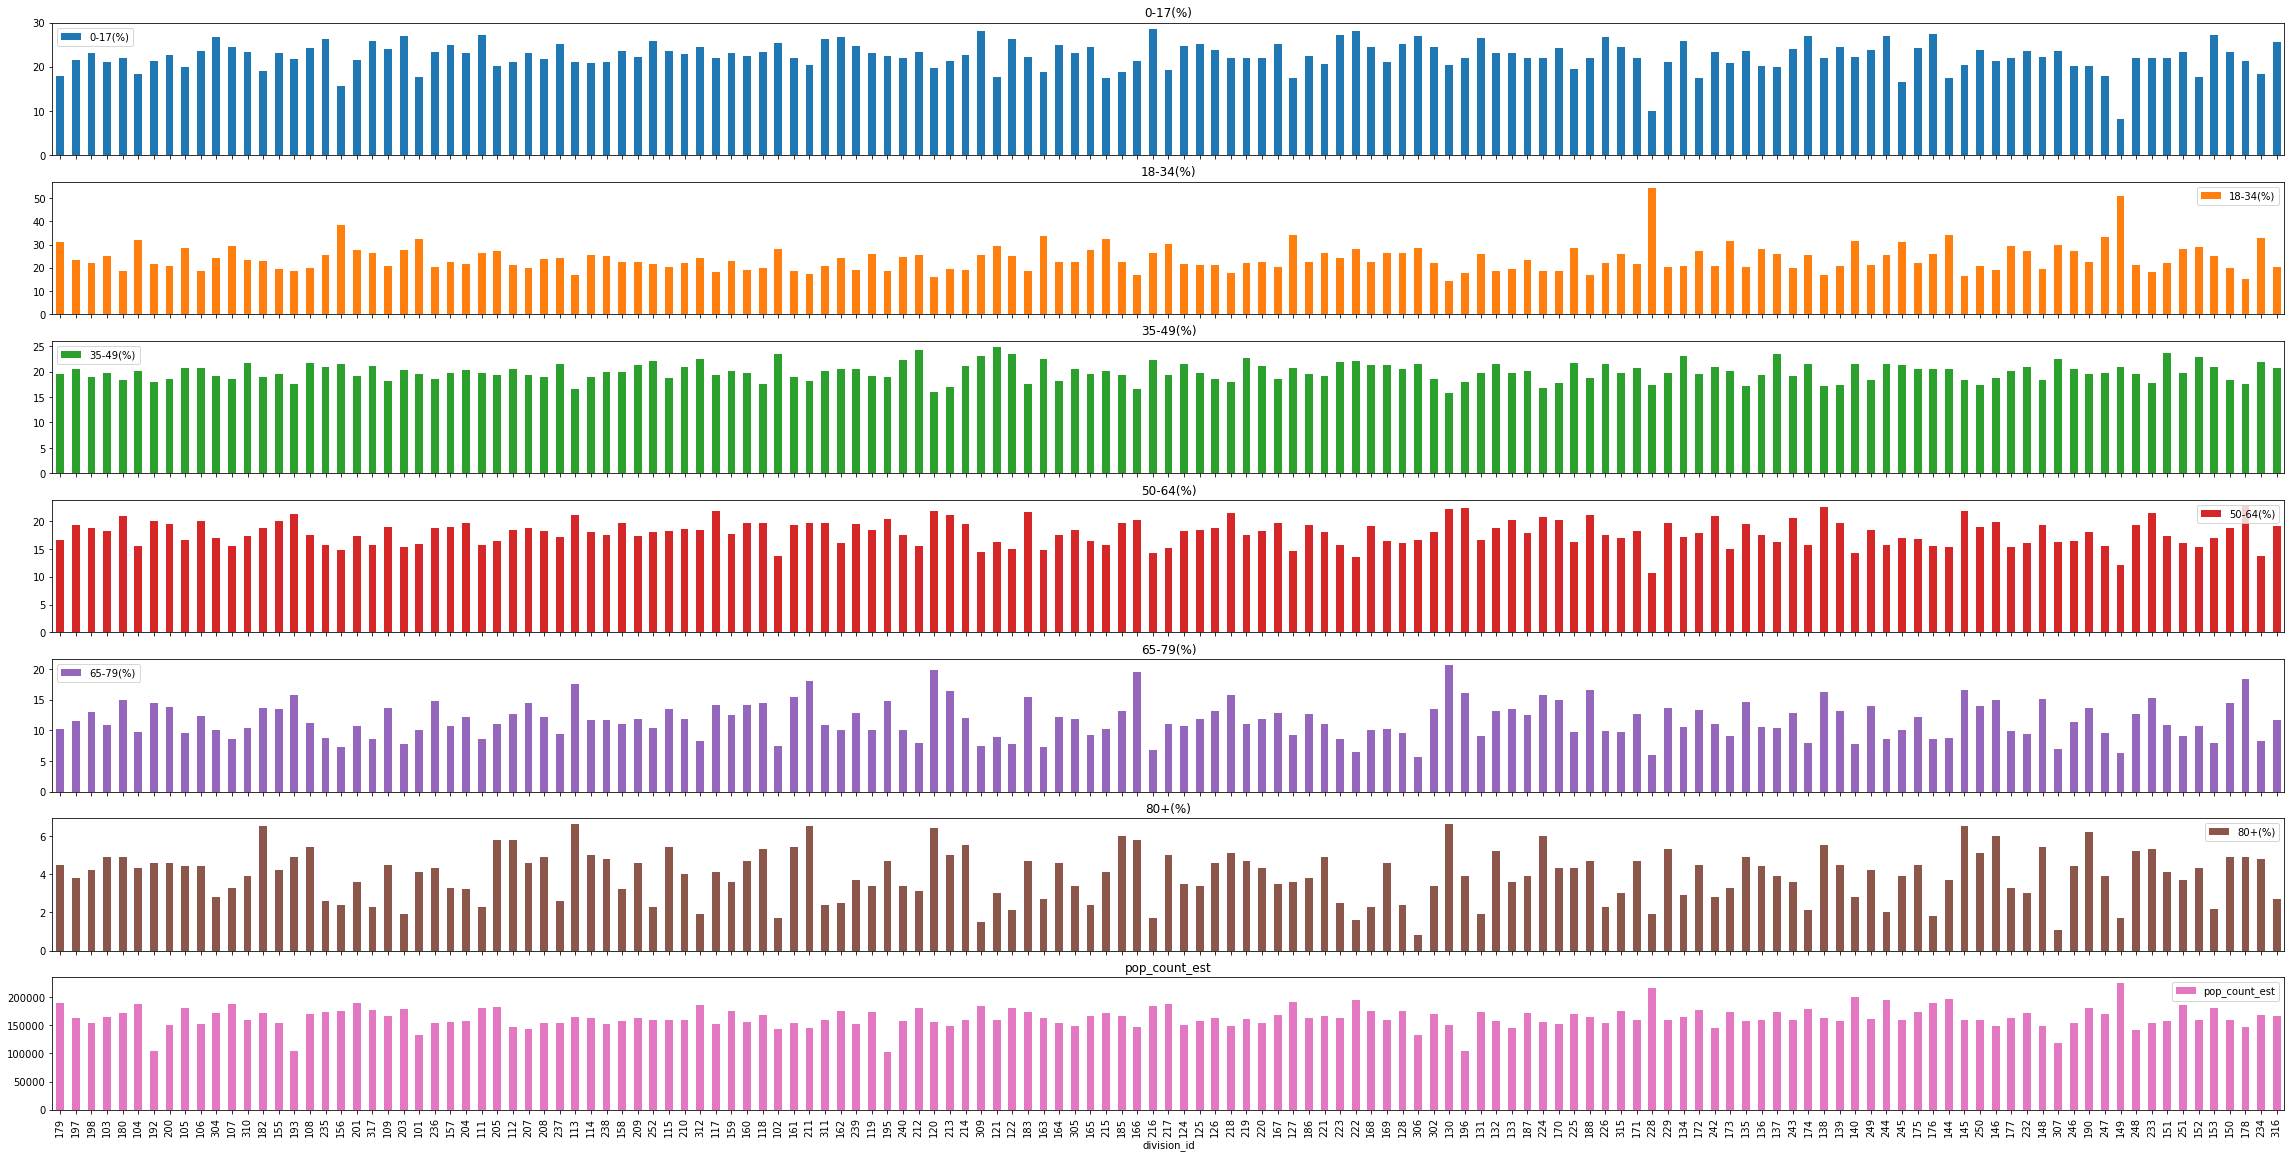

In [507]:
df_age_div_pop.plot.bar(rot=90, subplots=True, figsize=(40,20))